In [1]:
"""
Set up environment
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from scipy.stats import shapiro
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [2]:
"""
Load data
"""
iris = load_iris()

In [3]:
"""
Clean and transform data
"""
# examine iris data
print(f"Data shape: {iris.data.shape}")
print(f"Features: {iris.feature_names}\nLabels: {iris.target_names}")

# check assumptions about selection of GNB
# does this matter? do I eliminate sepal width?
for i, feature in enumerate(iris.feature_names):
    stat, p_value = shapiro(iris.data[:, np.newaxis, i])
    alpha = 0.05
    print(f"Shapiro-Wilk test for {feature}: p={p_value} | Gaussian? {p_value < alpha}")

iris_X = iris.data
iris_y = iris.target

Data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Labels: ['setosa' 'versicolor' 'virginica']
Shapiro-Wilk test for sepal length (cm): p=0.01017984002828598 | Gaussian? True
Shapiro-Wilk test for sepal width (cm): p=0.10113201290369034 | Gaussian? False
Shapiro-Wilk test for petal length (cm): p=7.412849778454245e-10 | Gaussian? True
Shapiro-Wilk test for petal width (cm): p=1.6802413682626138e-08 | Gaussian? True


In [14]:
"""
Define a data split method
"""
def shuffle(data, label):
    """Shuffles data according to a uniform distribution"""
    nrows = data.shape[0]
    shuffle = np.random.permutation(np.arange(nrows))
    return data[shuffle], label[shuffle], nrows
    
def split(shuffled_data, shuffled_label, nrows):
    """Splits data to a 90/10/10 for train/dev/test"""
    
    test_end = 0.7
    train_end = 0.4
    # split features
    X_test = shuffled_data[int(nrows * test_end):]
    X_dev = shuffled_data[int(nrows* train_end):int(nrows * test_end)-1]
    X_train = shuffled_data[:int(nrows * train_end)-1]

    # split labels
    y_test = shuffled_label[int(nrows * test_end):]
    y_dev = shuffled_label[int(nrows* train_end):int(nrows * test_end)-1]
    y_train = shuffled_label[:int(nrows * train_end)-1]
    
    return (X_train, y_train), (X_dev, y_dev), (X_test, y_test)

In [15]:
"""
Split data into train and test sets
"""
train, dev, test = split(*shuffle(iris.data, iris.target))

In [16]:
"""
Train model
"""
# Initialize model
gnb = GaussianNB()

# Train model using training set
gnb.fit(train[0], train[1])

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
"""
Make predictions with model
"""
# predict with dev features
dev_predict = gnb.predict(dev[0])

# predict with test features
test_predict = gnb.predict(test[0])

In [18]:
"""
Evaluate model
"""
# evaluate dev subset
print("-"*25)
print(f"DEV SUBSET")
print("-"*25)
print(f"Number of mislabeled points out of a total {iris.data.shape[0]}: {(dev[1] != dev_predict).sum()}")
print(f"Mean squared error: {mean_squared_error(dev[1], dev_predict)}")
print(f"Variance score: {r2_score(dev[1], dev_predict)}")

-------------------------
DEV SUBSET
-------------------------
Number of mislabeled points out of a total 150: 1
Mean squared error: 0.022727272727272728
Variance score: 0.9683908045977011


In [9]:
"""
Ideally, there will be tuning in between dev and test so we only ever test once
"""
# what goes here???

'\nIdeally, there will be tuning in between dev and test so we only ever test once\n'

In [19]:
"""
Evaluate Model
"""
# evaluate test subset
print("-"*25)
print(f"TEST SUBSET")
print("-"*25)
print(f"Number of mislabeled points out of a total {iris.data.shape[0]}: {(test[1] != test_predict).sum()}")
print(f"Mean squared error: {mean_squared_error(test[1], test_predict)}")
print(f"Variance score: {r2_score(test[1], test_predict)}")

-------------------------
TEST SUBSET
-------------------------
Number of mislabeled points out of a total 150: 2
Mean squared error: 0.044444444444444446
Variance score: 0.9166666666666666


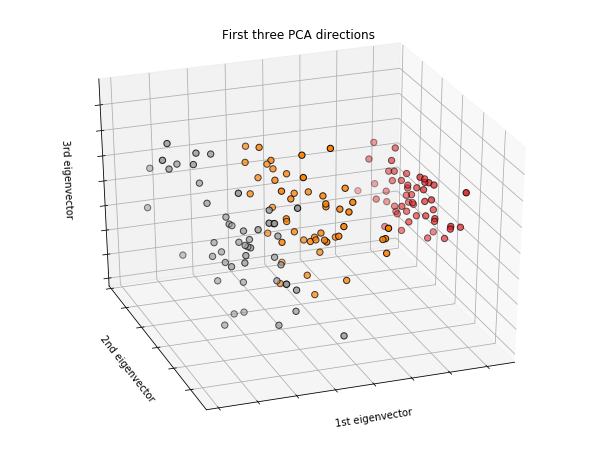

In [20]:
"""
Data Visualization
"""
# taken from Iris Dataset with Decision Tree notebook
y = iris.target
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# how can I best plot my predictions against test and visualize that?
# def needs more thought

In [21]:
"""
Complete pipeline
"""
def run_complete_pipeline():
    # load
    iris = load_iris()
    
    # transform
    iris_X = iris.data
    iris_y = iris.target
    
    # split
    train, dev, test = split(*shuffle(iris.data, iris.target))
    
    # train
    gnb = GaussianNB()
    gnb.fit(train[0], train[1])
    
    # predict
    dev_predict = gnb.predict(dev[0])
    
    # evaluate
    return mean_squared_error(dev_predict, dev[1])

/Users/zacharyschneider/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


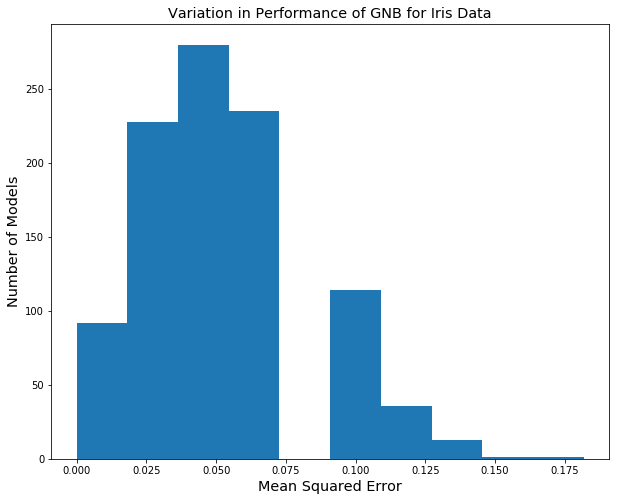

In [22]:
"""
Show the variation in performance
"""
performance = [run_complete_pipeline() for i in range(1000)]

# Plot variation
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
bins = ax.hist(performance)
ax.set_xlabel('Mean Squared Error', size='x-large')
ax.set_ylabel('Number of Models', size='x-large')
ax.set_title('Variation in Performance of GNB for Iris Data', size='x-large')
fig.show()

In [ ]:
"""
Implement GNB algorithm
"""

class GNB:
    def __init__(self):
        """Constructor for the GNB class
        
        Args:
            features (list of str): ideally something akin to iris.feature_names
            data (nested np.array, list, pd.Series): data for features
            labels (np.array, list, pd.Series): labels for data, most likely unnamed
            q_y (dict): map of unique labels to their frequency divided by total rows
            q_x_y (dict): map of unique data points to their probabilities, instantiated by the self.prob() function
        """
        self.features = features
        self.data = data
        self.labels = labels
        self.q_y = {y:count(labels == y)/len(self.labels) for y in self.labels.unique()}
        
        # TODO: update syntax to match indexing to data strcuture
        self.q_x_y = {d: prob(f, d) for d in self.data[f] for f in features}
    
    def prob(self, feature, data_point):
        """
        Goal: compute probabilities for each data point
        
        Returns: a probability (log adjusted) associated with the data point in question
        """
        for label in self.labels.unique():
            count_y = count(labels == y)
            for feature in self.features:
                q_x_y[feature] = []
                
            # compute p_q_y
            # compute p_q_x_y
            # store probability in a dict
        # probability of q_y = count(y) / n
        # probability of q_x_given_y = count(x and y occuring together) / count(y)
        # take log of the GNB model to prevent underflow